In [272]:
import pandas as pd
from holidays import UnitedStates
import seaborn as sns
import numpy as np

# Datasets Reading

In [273]:
taxi_df = pd.read_csv("dataset.csv", index_col=0)
# Create a new row for 2015-02-01 00:00:00
new_row = {'timestamp': pd.Timestamp('2015-02-01 00:00:00'), 'value': np.nan}

# Append the new row to the original DataFrame
taxi_df.loc[len(taxi_df)] = new_row
taxi_df

,timestamp,value
0,2014-07-01 00:00:00,10844.0
1,2014-07-01 00:30:00,8127.0
2,2014-07-01 01:00:00,6210.0
3,2014-07-01 01:30:00,4656.0
4,2014-07-01 02:00:00,3820.0
...,...,...
10316,2015-01-31 22:00:00,25721.0
10317,2015-01-31 22:30:00,27309.0
10318,2015-01-31 23:00:00,26591.0
10319,2015-01-31 23:30:00,26288.0


In [274]:
print(taxi_df.isnull().sum())
taxi_df.info()

timestamp    0
value        1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10321 entries, 0 to 10320
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  10321 non-null  object 
 1   value      10320 non-null  float64
dtypes: float64(1), object(1)
memory usage: 241.9+ KB


In [275]:
weather_df = pd.read_csv('weather_csv.csv')
weather_df.head()

,timestamp,prep,snow,min temp,max temp,dif temp
0,2014-07-01,0.00,0.0,0.0,72.0,72.0
1,2014-07-02,0.96,0.0,0.0,72.0,72.0
2,2014-07-03,1.78,0.0,0.0,69.0,69.0
3,2014-07-04,0.14,0.0,0.0,65.0,65.0
4,2014-07-05,0.00,0.0,0.0,63.0,63.0


In [276]:
print(weather_df.isnull().sum())
weather_df.info()

timestamp    0
prep         0
snow         0
min temp     0
max temp     0
dif temp     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  216 non-null    object 
 1   prep       216 non-null    float64
 2   snow       216 non-null    float64
 3   min temp   216 non-null    float64
 4   max temp   216 non-null    float64
 5   dif temp   216 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.3+ KB


In [277]:
# Create a holiday object for the US with state-specific holidays for New York
ny_holidays = UnitedStates(years=[2014, 2015], state='NY')

# Convert to a DataFrame
holidays_df = pd.DataFrame({
    "Date": list(ny_holidays.keys()),
    "Holiday": list(ny_holidays.values())
})

# Convert 'Date' to datetime
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

# Filter holidays up to '2015-01-31'
holidays_df = holidays_df.loc[(holidays_df['Date'] <= '2015-01-31') & (holidays_df['Date'] >= '2014-07-01')]

# Sort by index and rename the column "Date" to "timestamp"
holidays_df = holidays_df.sort_values(by=['Date'])

# Show the final DataFrame
holidays_df

,Date,Holiday
2,2014-07-04,Independence Day
3,2014-09-01,Labor Day
9,2014-10-13,Columbus Day
12,2014-11-04,Election Day
4,2014-11-11,Veterans Day
5,2014-11-27,Thanksgiving
6,2014-12-25,Christmas Day
13,2015-01-01,New Year's Day
21,2015-01-19,Martin Luther King Jr. Day


In [278]:
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df['year'] = taxi_df['timestamp'].dt.year
taxi_df['month'] = taxi_df['timestamp'].dt.month
taxi_df['day'] = taxi_df['timestamp'].dt.day
taxi_df['Date'] = taxi_df['timestamp'].dt.date
taxi_df['Date'] = taxi_df['Date'].apply(pd.to_datetime).dt.date
taxi_df['day_of_week'] = taxi_df['timestamp'].dt.day_of_week + 1
taxi_df['hour'] = taxi_df['timestamp'].dt.hour
taxi_df['isWeekend'] = taxi_df.day_of_week.map({1: False, 2: False, 3: False, 4: False, 5: False, 6: True, 7: True})

# Add time parts to the anomaly dates and update the 'isAnomaly' column
taxi_df['isAnomaly'] = False
anomaly_dates = ['2014-11-02', '2014-11-27', '2014-12-24', '2014-12-25', '2015-01-01', '2015-01-26', '2015-01-27']

anomaly_dates = [pd.to_datetime(date).date() for date in anomaly_dates]
taxi_df['isAnomaly'] = taxi_df['Date'].isin(anomaly_dates)

# View the dataset for verification
taxi_df.loc[taxi_df['isAnomaly']][['Date', 'isAnomaly']]

,Date,isAnomaly
5952,2014-11-02,True
5953,2014-11-02,True
5954,2014-11-02,True
5955,2014-11-02,True
5956,2014-11-02,True
...,...,...
10123,2015-01-27,True
10124,2015-01-27,True
10125,2015-01-27,True
10126,2015-01-27,True


In [279]:
taxi_df

,timestamp,value,year,month,day,Date,day_of_week,hour,isWeekend,isAnomaly
0,2014-07-01 00:00:00,10844.0,2014,7,1,2014-07-01,2,0,False,False
1,2014-07-01 00:30:00,8127.0,2014,7,1,2014-07-01,2,0,False,False
2,2014-07-01 01:00:00,6210.0,2014,7,1,2014-07-01,2,1,False,False
3,2014-07-01 01:30:00,4656.0,2014,7,1,2014-07-01,2,1,False,False
4,2014-07-01 02:00:00,3820.0,2014,7,1,2014-07-01,2,2,False,False
...,...,...,...,...,...,...,...,...,...,...
10316,2015-01-31 22:00:00,25721.0,2015,1,31,2015-01-31,6,22,True,False
10317,2015-01-31 22:30:00,27309.0,2015,1,31,2015-01-31,6,22,True,False
10318,2015-01-31 23:00:00,26591.0,2015,1,31,2015-01-31,6,23,True,False
10319,2015-01-31 23:30:00,26288.0,2015,1,31,2015-01-31,6,23,True,False


Merging datasets

In [280]:
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
taxi_df['Date'] = pd.to_datetime(taxi_df['Date'])
merged_data = pd.merge(taxi_df, holidays_df, how='left', on='Date')

weather_df['timestamp'] = weather_df['timestamp'] + ' 00:00:00'
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'] + ' 00:00:00')
weather_df['timestamp'] = weather_df['timestamp'].dt.normalize()
weather_df
merged_data = pd.merge(merged_data, weather_df, how='left', on='timestamp')
merged_data.loc[~merged_data['Holiday'].isnull()]

C:\Users\weare\AppData\Local\Temp\ipykernel_24480\2614963403.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'] + ' 00:00:00')


,timestamp,value,year,month,day,Date,day_of_week,hour,isWeekend,isAnomaly,Holiday,prep,snow,min temp,max temp,dif temp
144,2014-07-04 00:00:00,15591.0,2014,7,4,2014-07-04,5,0,False,False,Independence Day,0.14,0.0,0.0,65.0,65.0
145,2014-07-04 00:30:00,14395.0,2014,7,4,2014-07-04,5,0,False,False,Independence Day,NaN,NaN,NaN,NaN,NaN
146,2014-07-04 01:00:00,12535.0,2014,7,4,2014-07-04,5,1,False,False,Independence Day,NaN,NaN,NaN,NaN,NaN
147,2014-07-04 01:30:00,11341.0,2014,7,4,2014-07-04,5,1,False,False,Independence Day,NaN,NaN,NaN,NaN,NaN
148,2014-07-04 02:00:00,9980.0,2014,7,4,2014-07-04,5,2,False,False,Independence Day,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,2015-01-19 21:30:00,14069.0,2015,1,19,2015-01-19,1,21,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN,NaN
9740,2015-01-19 22:00:00,13506.0,2015,1,19,2015-01-19,1,22,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN,NaN
9741,2015-01-19 22:30:00,12936.0,2015,1,19,2015-01-19,1,22,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN,NaN
9742,2015-01-19 23:00:00,10400.0,2015,1,19,2015-01-19,1,23,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN,NaN


In [283]:
merged_data

,timestamp,value,year,month,day,Date,day_of_week,hour,isWeekend,isAnomaly,Holiday,prep,snow,min temp,max temp,dif temp
0,2014-07-01 00:00:00,10844.0,2014,7,1,2014-07-01,2,0,False,False,NaN,0.00,0.0,0.0,72.0,72.0
1,2014-07-01 00:30:00,8127.0,2014,7,1,2014-07-01,2,0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-01 01:00:00,6210.0,2014,7,1,2014-07-01,2,1,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-07-01 01:30:00,4656.0,2014,7,1,2014-07-01,2,1,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-07-01 02:00:00,3820.0,2014,7,1,2014-07-01,2,2,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,2015-01-31 22:00:00,25721.0,2015,1,31,2015-01-31,6,22,True,False,NaN,NaN,NaN,NaN,NaN,NaN
10317,2015-01-31 22:30:00,27309.0,2015,1,31,2015-01-31,6,22,True,False,NaN,NaN,NaN,NaN,NaN,NaN
10318,2015-01-31 23:00:00,26591.0,2015,1,31,2015-01-31,6,23,True,False,NaN,NaN,NaN,NaN,NaN,NaN
10319,2015-01-31 23:30:00,26288.0,2015,1,31,2015-01-31,6,23,True,False,NaN,NaN,NaN,NaN,NaN,NaN


Filling the missing values

# Data Analysis

<Axes: >

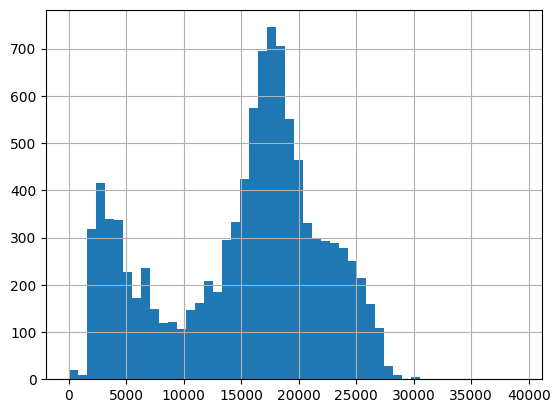

In [281]:
taxi_df['value'].hist(bins=50)


<Axes: xlabel='value'>

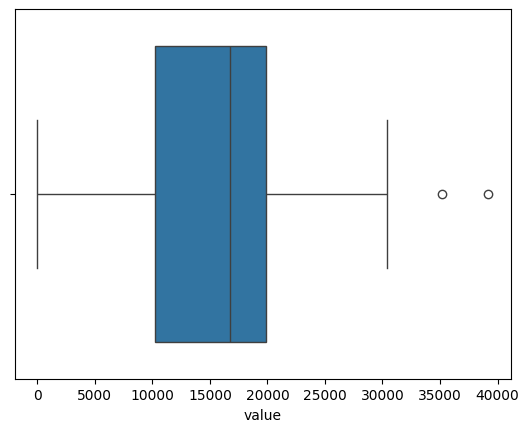

In [282]:
sns.boxplot(x=taxi_df['value'])